In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = './data/'
X = pd.read_csv(data_dir+'features.csv')
X.set_index('Unnamed: 0', inplace=True)
display(X.shape)
y = pd.read_csv(data_dir+'labels.csv', index_col=False)
y.set_index('Unnamed: 0', inplace=True)
display(y.shape)

(139, 20501)

(139, 1)

In [4]:
geneset_dict = pickle.load(open(data_dir + 'hallmarks_of_cancer_geneset_dictionary.pkl','rb'))
all_hallmark_genes = np.unique(np.concatenate([v for k,v in geneset_dict.items()]))
len(all_hallmark_genes)

4384

In [7]:
X_sub = X.loc[:,np.intersect1d(X.columns.values,all_hallmark_genes)]
display(X_sub.shape)
X_sub.head()

(139, 4223)

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,1,412,141,1564,260,0,0,399,287,3220
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,2,347,124,1320,339,0,0,642,100,2903
tcga-2y-a9gw-5,43813,622,49,4758,7663,1649,2252,96,58,1284,...,6,431,646,935,361,0,0,351,221,8467
tcga-2y-a9gy-7,11699,1179,81,2991,966,1559,935,22,28,641,...,2,371,264,709,584,0,0,318,735,3825
tcga-2y-a9gz-8,264407,919,1435,3304,21557,1762,2134,107,42,2779,...,2,514,156,874,285,0,0,648,259,1394


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, np.ravel(y), test_size=0.20, shuffle=True, random_state=42)

In [42]:
pipe = Pipeline(steps = [('scaler', StandardScaler()), ('classifier', SVC(kernel='rbf')) ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.39285714285714285

In [18]:
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[ 5,  0,  2],
       [ 4,  0,  1],
       [10,  0,  6]])

In [53]:
pipe = Pipeline(steps = [('scaler', StandardScaler()), ("pca", PCA(n_components=30)), ('classifier', SVC(kernel='rbf')) ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.25

In [54]:
param_grid = {'classifier__C': np.logspace(-3, 2, 6), 
              'classifier__gamma': np.logspace(-3, 2, 6), 
              }

grid = GridSearchCV(pipe, param_grid=param_grid)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'classifier__C': 1.0, 'classifier__gamma': 0.001} with a score of 0.43


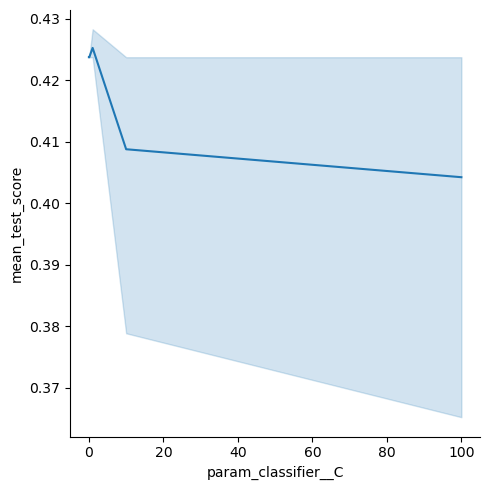

In [64]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__C',
            y='mean_test_score',
            )
plt.show()


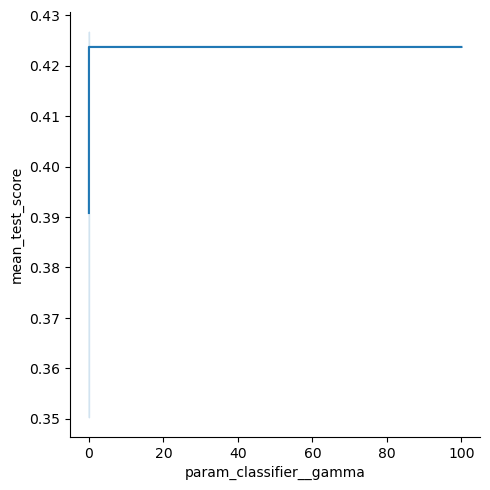

In [66]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__gamma',
            y='mean_test_score',
            )
plt.show()

In [61]:
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088754,0.004377,0.021215,0.000509,0.001,0.001,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
1,0.092790,0.011877,0.021124,0.000650,0.001,0.01,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
2,0.084953,0.002368,0.020931,0.000267,0.001,0.1,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
3,0.083620,0.002746,0.020935,0.000541,0.001,1.0,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
4,0.088030,0.004313,0.020438,0.000282,0.001,10.0,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
5,0.094494,0.008387,0.021615,0.000577,0.001,100.0,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
6,0.088845,0.002755,0.020925,0.000186,0.01,0.001,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
7,0.087476,0.001340,0.020885,0.000580,0.01,0.01,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
8,0.093493,0.013715,0.021051,0.000753,0.01,0.1,"{'classifier__C': 0.01, 'classifier__gamma': 0.1}",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2
9,0.083280,0.003101,0.020748,0.000184,0.01,1.0,"{'classifier__C': 0.01, 'classifier__gamma': 1.0}",0.391304,0.409091,0.454545,0.454545,0.409091,0.423715,0.025997,2


In [55]:
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.8558558558558559
Test set score: 0.32142857142857145


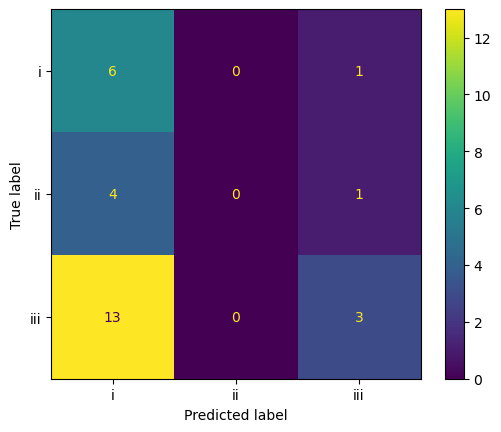

In [58]:
# grid_predictions = grid.predict(X_test)

# cm = confusion_matrix(y_test, grid_predictions)
# display(cm)

# print(classification_report(y_test, grid_predictions))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['i', 'ii', 'iii'])

cm_display.plot()
plt.show()